# Data Understanding Basic

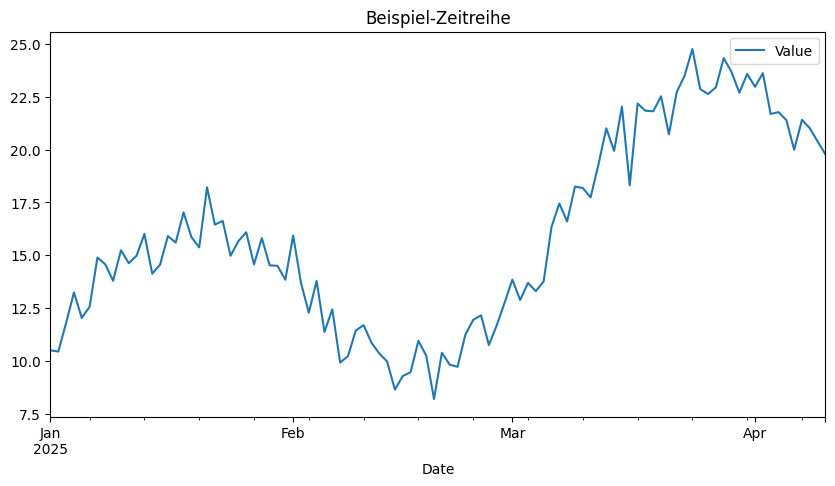

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Zeitindex: 100 Tage
np.random.seed(42)
dates = pd.date_range(start='2025-01-01', periods=100, freq='D')

# Zeitreihe: Trend + saisonale Komponente + Rauschen
trend = np.linspace(10, 20, 100)                # linearer Trend
seasonal = 5 * np.sin(np.linspace(0, 3*np.pi, 100))  # saisonaler Effekt
noise = np.random.normal(0, 1, 100)            # zufälliges Rauschen

data = trend + seasonal + noise

# DataFrame
df = pd.DataFrame({'Date': dates, 'Value': data})
df.set_index('Date', inplace=True)

# Visualisierung
df.plot(figsize=(10,5), title='Beispiel-Zeitreihe')
plt.show()


In [2]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Value'])
print(f'ADF-Statistik: {result[0]:.3f}')
print(f'p-Wert: {result[1]:.3f}')

if result[1] < 0.05:
    print("Die Zeitreihe ist stationär.")
else:
    print("Die Zeitreihe ist nicht stationär.")


ADF-Statistik: -2.231
p-Wert: 0.195
Die Zeitreihe ist nicht stationär.


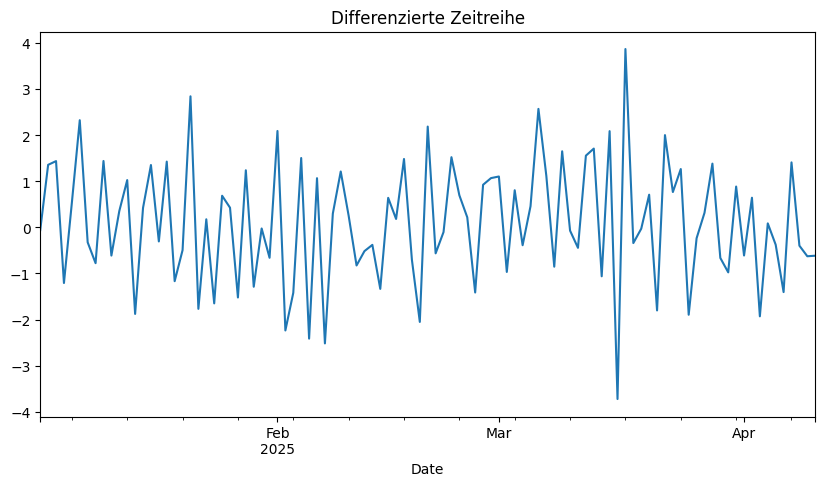

ADF-Statistik (differenziert): -2.159
p-Wert: 0.221
Die differenzierte Zeitreihe ist noch nicht stationär.


In [3]:
# Erste Differenz
df_diff = df['Value'].diff().dropna()

# Visualisierung
df_diff.plot(figsize=(10,5), title='Differenzierte Zeitreihe')
plt.show()

# ADF-Test erneut
result_diff = adfuller(df_diff)
print(f'ADF-Statistik (differenziert): {result_diff[0]:.3f}')
print(f'p-Wert: {result_diff[1]:.3f}')

if result_diff[1] < 0.05:
    print("Die differenzierte Zeitreihe ist stationär.")
else:
    print("Die differenzierte Zeitreihe ist noch nicht stationär.")


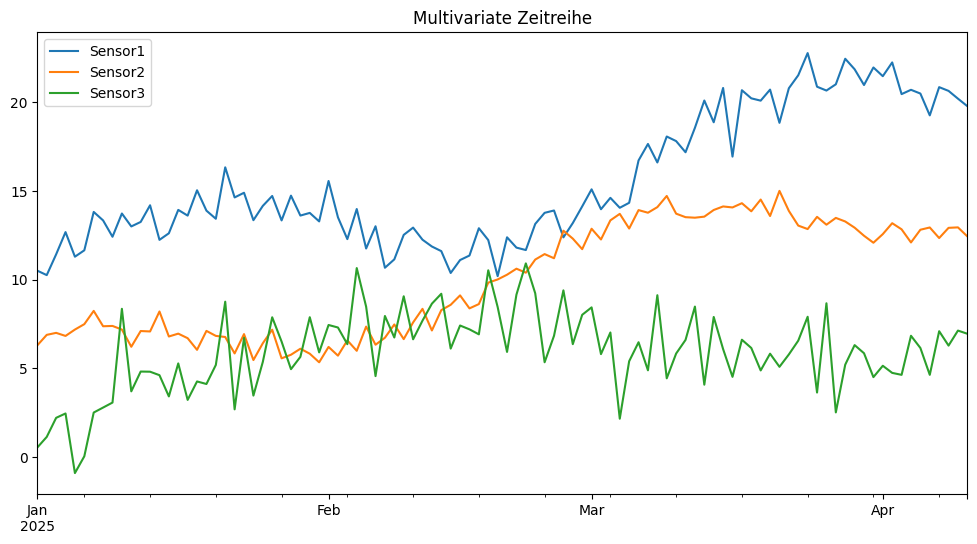

        ADF-Statistik    p-Wert Stationär
Sensor1     -1.041721  0.737745     False
Sensor2     -1.105079  0.713042     False
Sensor3     -3.615797  0.005466      True


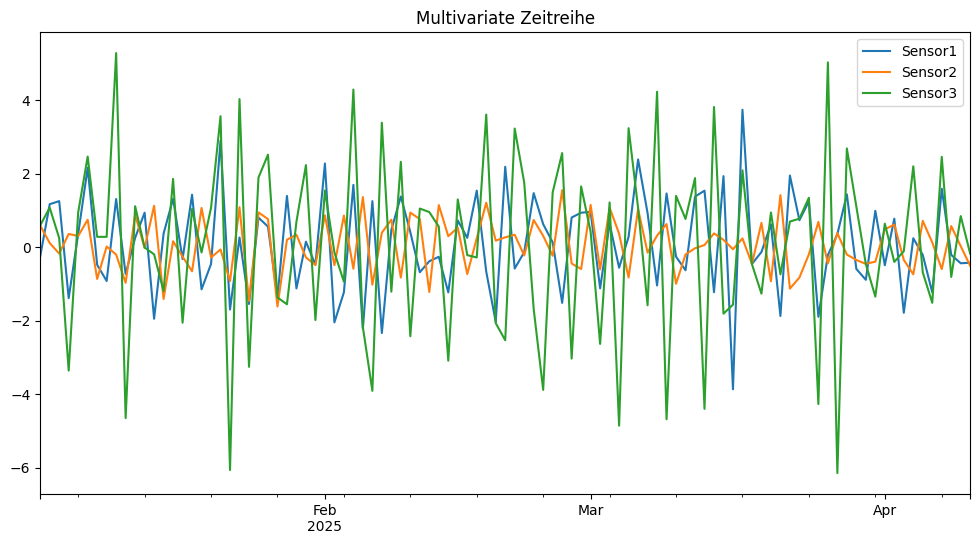

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

class MultivariateTimeSeries:
    def __init__(self, df: pd.DataFrame):
        """
        df: DataFrame mit Zeitindex und mehreren Zeitreihen-Spalten
        """
        self.df = df.copy()
        if not isinstance(self.df.index, pd.DatetimeIndex):
            raise ValueError("DataFrame muss einen DatetimeIndex haben")
    
    def plot_series(self):
        """Visualisiert alle Zeitreihen"""
        self.df.plot(figsize=(12,6), title="Multivariate Zeitreihe")
        plt.show()
    
    def adf_test(self):
        """ADF-Test für jede Spalte"""
        results = {}
        for col in self.df.columns:
            result = adfuller(self.df[col])
            results[col] = {
                "ADF-Statistik": result[0],
                "p-Wert": result[1],
                "Stationär": result[1] < 0.05
            }
        return pd.DataFrame(results).T
    
    def difference(self, periods=1):
        """Differenzieren aller Spalten, um Stationarität zu erreichen"""
        df_diff = self.df.diff(periods=periods).dropna()
        return MultivariateTimeSeries(df_diff)
    
    def plot_differenced(self, periods=1):
        """Visualisiert die differenzierte Zeitreihe"""
        diff_obj = self.difference(periods=periods)
        diff_obj.plot_series()

# -----------------------------
# Beispiel mit simulierten multivariaten Daten
# -----------------------------
np.random.seed(42)
dates = pd.date_range('2025-01-01', periods=100, freq='D')

# 3 Sensoren / Zeitreihen
trend1 = np.linspace(10, 20, 100)
trend2 = np.linspace(5, 15, 100)
trend3 = np.linspace(0, 10, 100)

seasonal1 = 3 * np.sin(np.linspace(0, 3*np.pi, 100))
seasonal2 = 2 * np.cos(np.linspace(0, 3*np.pi, 100))
seasonal3 = 4 * np.sin(np.linspace(0, 1.5*np.pi, 100))

noise1 = np.random.normal(0,1,100)
noise2 = np.random.normal(0,0.5,100)
noise3 = np.random.normal(0,1.5,100)

data = pd.DataFrame({
    'Sensor1': trend1 + seasonal1 + noise1,
    'Sensor2': trend2 + seasonal2 + noise2,
    'Sensor3': trend3 + seasonal3 + noise3
}, index=dates)

# Klasse verwenden
mts = MultivariateTimeSeries(data)
mts.plot_series()

# ADF-Test
print(mts.adf_test())

# Differenzierte Zeitreihe visualisieren
mts.plot_differenced()
